<a href="https://colab.research.google.com/github/aerau05/ml_assignments/blob/main/wrangling_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/aerau05/scratchpad
%cd scratchpad
!ls
%run get_data.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 27 (delta 4), reused 4 (delta 4), pack-reused 18 (from 1)
Receiving objects: 100% (27/27), 44.09 KiB | 2.45 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/scratchpad
'ds3001(1_20).ipynb'   get_data.py   nb_2026_01_05.ipynb   README.md
Download complete
Extracting data files...
Data extracted


In [4]:
# Question 1.1
df = pd.read_csv('/content/scratchpad/data/airbnb_NYC.csv',encoding='latin1')
df.head()

df['Price_clean'] = (
    df['Price']
    .astype(str)  # forces everything to string
    .str.replace(r'[^\d.]', '', regex=True) # replaces anything that's not a number with nothing
)
df['Price_clean'] = pd.to_numeric(df['Price_clean'], errors='coerce') # changes strings to int and any missing values to NaN
int(df['Price_clean'].isna().sum()) # counts number of missing values






0

In [27]:
# Question 1.2
df = pd.read_csv('/content/scratchpad/data/mn_police_use_of_force.csv', encoding='latin1')
df.head()
df['subject_injury_clean'] = df['subject_injury'].astype(str).str.strip().str.lower()
df['subject_injury_clean'] = df['subject_injury'].replace({
    'yes': 'Yes',      # these lines clean the data so it is consistent and can be managed
    'no': 'No',
    'nan': np.nan,
    'none': np.nan,
    '': np.nan
})
df['subject_injury_clean'].value_counts(dropna=False)
missing_count = df['subject_injury_clean'].isna().sum() # counts missing values
total_count = len(df) # finds total number of entries

missing_proportion = missing_count / total_count # computes the proportion of missing values
print('Missing Proportion:', missing_proportion)
print(pd.crosstab(df['force_type'], df['subject_injury_clean'], dropna=False)) # creates table to show force type and injury result

df['subject_injury_final'] = df['subject_injury_clean'].fillna('Missing') # replaces NaN with "missing"
df['subject_injury_final'].value_counts() # displays final counts under yes, no and missing categories.



Missing Proportion: 0.7619342359767892
subject_injury_clean           No   Yes   NaN
force_type                                   
Baton                           0     2     2
Bodily Force                 1093  1286  7051
Chemical Irritant             131    41  1421
Firearm                         2     0     0
Gun Point Display              33    44    27
Improvised Weapon              34    40    74
Less Lethal                     0     0    87
Less Lethal Projectile          1     2     0
Maximal Restraint Technique     0     0   170
Police K9 Bite                  2    44    31
Taser                         150   172   985


,count
subject_injury_final,
Missing,9848
Yes,1631
No,1446


In [42]:
# Question 1.3
df = pd.read_csv('/content/scratchpad/data/metabric.csv', encoding='latin1')
df.head()
df['Overall Survival Status'].value_counts()
df['OS_dummy'] = df['Overall Survival Status'].map({ # funciton changes "0:Living" to 1 and "1:Deceased" to 0
    '0:LIVING': 1,
    '1:DECEASED': 0
})
df['OS_dummy'].value_counts() # counts number of 0s and 1s

,count
OS_dummy,
0,768
1,575


In [52]:
# Question 1.4
df = pd.read_csv('/content/scratchpad/data/airbnb_NYC.csv',encoding='latin1')
df['Review Scores Rating'].head()
missing_count = df["Review Scores Rating"].isna().sum() # finds number missing
print('Missing Count:',missing_count)
median_score = df["Review Scores Rating"].median() # finds the median score
print('Median Score:',median_score)
df['Review_Scores_Imputed'] = df['Review Scores Rating'].fillna(median_score) # fills missing scores with the median
df[['Review Scores Rating', 'Review_Scores_Imputed']].head(15)
df['Review_Scores_Imputed'].isna().sum() # makes sure no more missing values


Missing Count: 8323
Median Score: 94.0


np.int64(0)

(7070, 23)
(7070, 23)


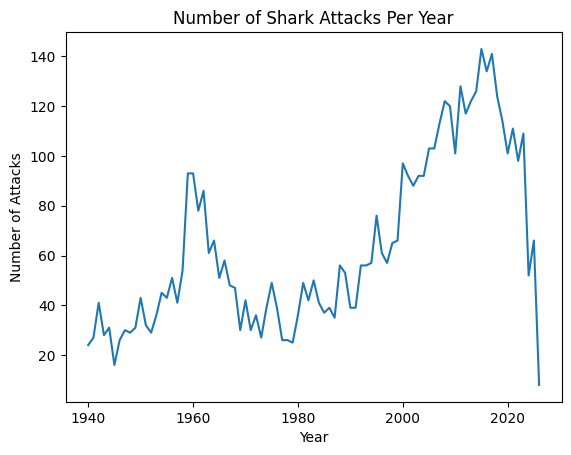

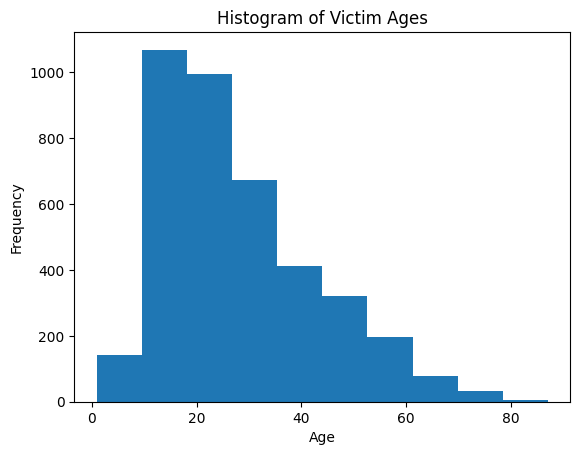

Proportion unprovoked: 0.7386138613861386
Fatal_clean
N          4939
Y          1488
Unknown     643
Name: count, dtype: int64


Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742244,0.015128,0.242627


In [108]:
# Question 2
from google.colab import files
df = pd.read_excel('/content/GSAF5.xls')
df.head()
print(df.shape)
df = df.dropna(axis=1, how='all') # dropping columns that have no data in them
print(df.shape)
# no columns were dropped so there are some data points in all of the columns

# year variable
df['Year'].head(20)
df['Year'].dtype # find out what form data is in
df['Year_clean'] = pd.to_numeric(df['Year'], errors='coerce') # makes sure everything is int and missing values are NaN
df['Year_clean'].describe()
df['Year_clean'].min(), df['Year_clean'].max() # shows range

df_1940 = df[df['Year_clean'] >= 1940] # focuses on years after 1940
attacks_per_year = df_1940['Year_clean'].value_counts().sort_index()
attacks_per_year.plot() # plot shows that since 1940 there have been two peaks in shark attacks around 1960 and 2015
plt.title('Number of Shark Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

# age variable
df['Age'].head(20)
df['Age_clean'] = pd.to_numeric(df['Age'], errors='coerce') # changes all ages to numbers and removes any non-numbers (for ex. ?)
df['Age_clean'].describe()
plt.figure() # plot the histogram
plt.hist(df['Age_clean'].dropna())
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Victim Ages')
plt.show()

# type variable
df['Type_clean'] = df['Type'].str.strip().str.title()
df['Type_clean'] = df['Type_clean'].where(
    df['Type_clean'].isin(['Provoked', 'Unprovoked']), # only takes provoked, unprovoked, and unknown
    'Unknown'
)
df['Type_clean'].value_counts()
total_attacks = len(df)
unprovoked_count = (df['Type_clean'] == 'Unprovoked').sum()
proportion_unprovoked = unprovoked_count / total_attacks # finds the proportion of unprovoked attacks vs total attacks
print('Proportion unprovoked:',proportion_unprovoked)

# fatal variable
df['Fatal Y/N'].value_counts(dropna=False)
df['Fatal_clean'] = df['Fatal Y/N'].astype(str).str.strip().str.upper()
df['Fatal_clean'] = df['Fatal_clean'].where( # only takes Y, N, and unknown values
    df['Fatal_clean'].isin(['Y', 'N']),
    'Unknown'
)
print(df['Fatal_clean'].value_counts())

# Comparing fatality and type of attack
pd.crosstab(df['Type_clean'], df['Fatal_clean'], normalize='index')
# find that the it is most likely for an attack to be unprovoked and not fatal



Q3. Open the "tidy_data.pdf" document available in https://github.com/ds4e/wrangling, which is a paper called Tidy Data by Hadley Wickham.

1. Read the abstract. What is this paper about?

This paper is about tidying data sets to make them easier to deal with. The abstract references a particular format that is to be used for datasets to ensure consisent data structure for handling.

2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The tidy data standard is meant to make data analysis easier. It provides a standard way to organize data so analysis does not have to start from scratch, instead there is a pre-set format of how the data should be cleaned to ensure easier data analsis and exploration.

3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

The first sentence means that tidy datasets all follow the same structure with rows, columns, etc, making them predictable and easy to work with. But messy datasets, on the other hand can be messy in many different ways so each one requires a uniqe cleaning approach.

4. Read Section 2.2. How does Wickham define values, variables, and observations?

He defines values as the makeup of a data set which belong to a variable and an observation. Variables, he says, are values that measure the same underlying attribute while observations and values that measure across a unit/ subject.  

5. How is "Tidy Data" defined in section 2.3?

Tidy data is defined in this section as having variables forming the columns, observations forming the rows, and each type of observational uint forming a table.

6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

The 5 most common problems with messy datasets are column headers are values not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables.
Table 4 is messy because variables form both the rows and columns and column headers are values, not varible names.
Melting a dataset is stacking it, or turning columns into rows. Melint is parameterised by a list of colums that are already variables. The other columns are converted into two variables: a new variable called column that contains repreated column headings and a new variable called value that contains the concatenated data values from the previously seperate columns.

7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because it mixes up the variables and observations by having a column for every day in each month. Table 12, on the other hand, is tidy because its variables and observations are seperate, and it is molten because it measures each day as a row/ observation instead of in seperate columns.

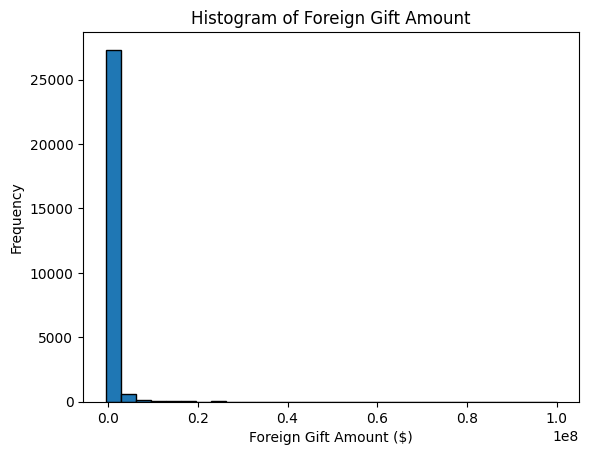

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


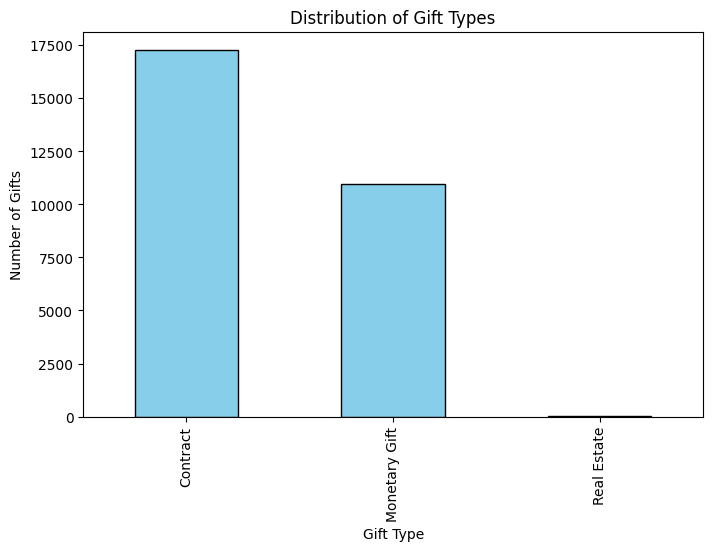

Top 15 countries by number of gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Top 15 countries by total gift amount:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA   

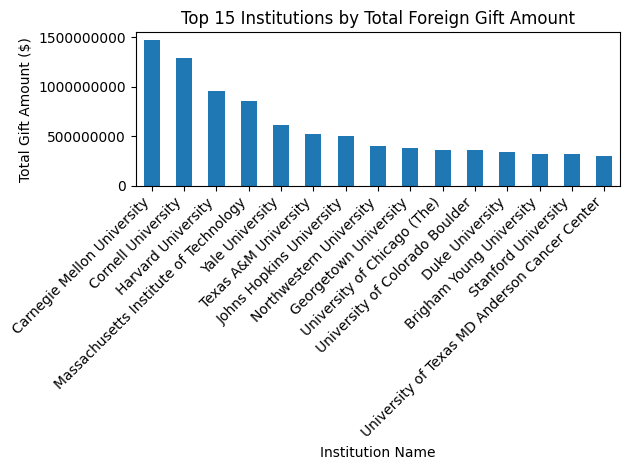

,Foreign_Gift_Amount_clean
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


In [43]:
# Q4. This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

# 1. Load the ForeignGifts_edu.csv dataset.
df = pd.read_csv('/content/scratchpad/data/ForeignGifts_edu.csv', encoding='latin1')
df['Foreign Gift Amount'].head()

# 2. For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.
df['Foreign Gift Amount'].head(20)
df['Foreign_Gift_Amount_clean'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')
df['Foreign_Gift_Amount_clean'] = df['Foreign_Gift_Amount_clean'].astype('Int64')
df['Foreign_Gift_Amount_clean'].describe()

plt.hist(df['Foreign_Gift_Amount_clean'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Foreign Gift Amount ($)')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

# 3. For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
df['Gift Type'].value_counts(dropna=False)
total_gifts = len(df)
proportions = df['Gift Type'].value_counts() / total_gifts
print(proportions)
plt.figure(figsize=(8,5))
df['Gift Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Number of Gifts')
plt.xlabel('Gift Type')
plt.title('Distribution of Gift Types')
plt.show()

# 4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
top_countries_count = df['Country of Giftor'].value_counts().head(15)
print('Top 15 countries by number of gifts:')
print(top_countries_count)

top_countries_amount = df.groupby('Country of Giftor')['Foreign_Gift_Amount_clean'].sum().sort_values(ascending=False).head(15)
print('Top 15 countries by total gift amount:')
print(top_countries_amount)

# 5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
top15 = df.groupby("Institution Name")['Foreign_Gift_Amount_clean'].sum() \
          .sort_values(ascending=False).head(15)
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
top15.plot(kind='bar')
plt.xlabel('Institution Name')
plt.ylabel('Total Gift Amount ($)')
plt.title('Top 15 Institutions by Total Foreign Gift Amount')
plt.xticks(rotation=45, ha='right')
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

#6. Which giftors provide the most money, in total?
df_giftors = df.dropna(subset=['Giftor Name', 'Foreign_Gift_Amount_clean'])
top_giftors = df_giftors.groupby("Giftor Name")['Foreign_Gift_Amount_clean'] \
                        .sum() \
                        .sort_values(ascending=False)
top_giftors.head(15)



level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


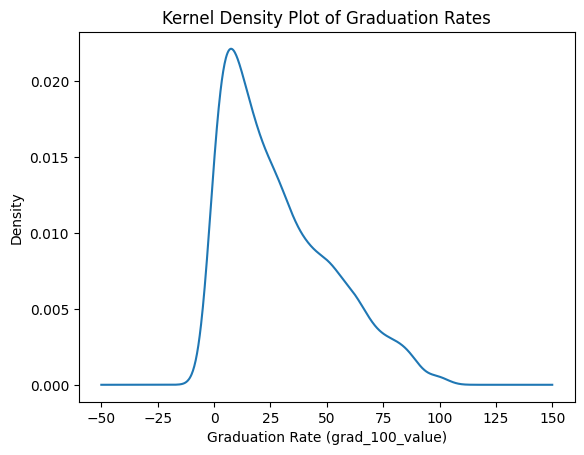

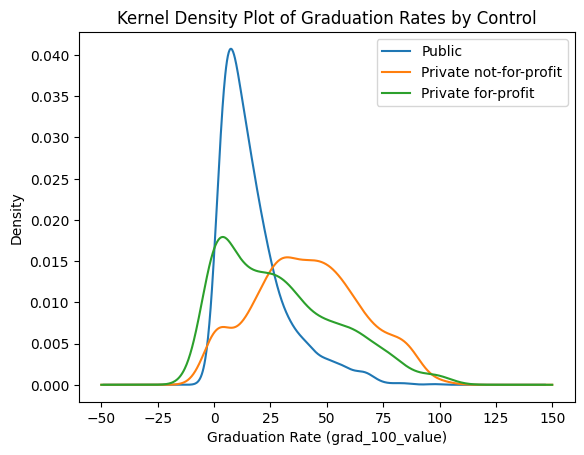

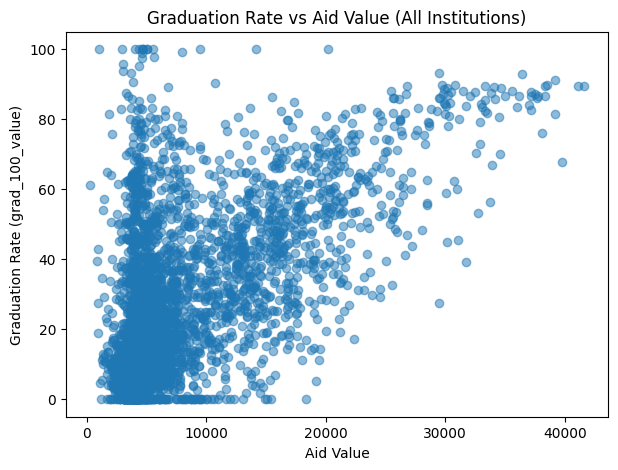

Covariance: 88610.48316902434 Correlation: 0.5758792845936073


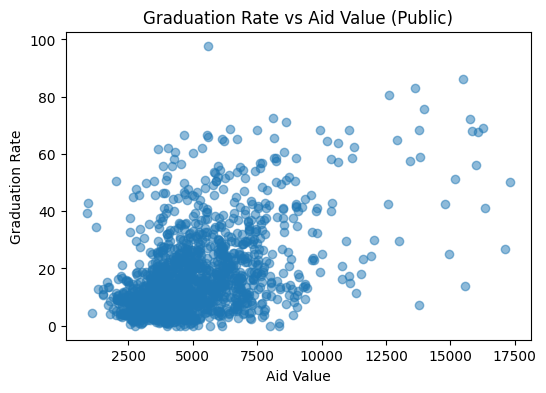

Public: Covariance = 15355.15, Correlation = 0.48


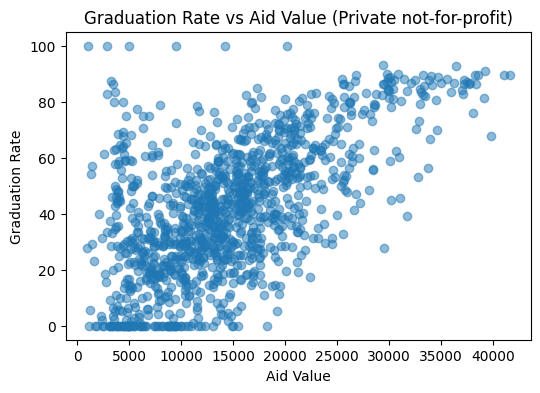

Private not-for-profit: Covariance = 109274.12, Correlation = 0.60


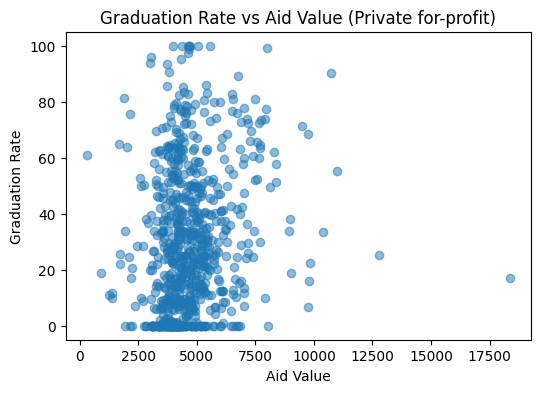

Private for-profit: Covariance = 6897.52, Correlation = 0.19


In [59]:
# Q5. This question provides some practice doing exploratory data analysis and visualization.

# We'll use the college_completion.csv dataset from the US Department of Education. The "relevant" variables for this question are:

# level - Level of institution (4-year, 2-year)
# aid_value - The average amount of student aid going to undergraduate recipients
# control - Public, Private not-for-profit, Private for-profit
# grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)
# Load the college_completion.csv data with Pandas.
df=pd.read_csv('/content/scratchpad/data/college_completion.csv',encoding='latin-1')

# How many observations and variables are in the data? Use .head() to examine the first few rows of data.
df.shape
df.head() # 5 rows and 63 columns - 5 observations and 63 variables

# Cross tabulate control and level. Describe the patterns you see in words.
print(pd.crosstab(df['control'], df['level'])) # The table shows that private, not-for-profit schools are primarily 4-year collages while public institusions are more likely to be 2-year schools.

# For grad_100_value, create a kernel density plot and describe table. Now condition on control, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
df['grad_100_value_clean'] = pd.to_numeric(df['grad_100_value'], errors='coerce')

df['grad_100_value_clean'].dropna().plot(kind='kde')
plt.xlabel('Graduation Rate (grad_100_value)')
plt.title('Kernel Density Plot of Graduation Rates')
plt.show()

for c in df['control'].dropna().unique():
    subset = df[df['control'] == c]['grad_100_value_clean'].dropna()
    subset.plot(kind='kde', label=c)
plt.xlabel('Graduation Rate (grad_100_value)')
plt.title('Kernel Density Plot of Graduation Rates by Control')
plt.legend()
plt.show()
# The overal KDE plot shows a unimodal pattern with graduation rates concentrated around 40-70%
# The KDE plot seperating the different types of schools shows that there are differences between types of institutions
# Private not-for-profit schools tend to have higher graduation rates
# Public schools have a similar shape to the overal KDE plot
# Private for-profit schools have lower graduation rates overall

# Make a scatterplot of grad_100_value by aid_value, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on control. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?
df['grad_100_value_clean'] = pd.to_numeric(df['grad_100_value'], errors='coerce')
df['aid_value_clean'] = pd.to_numeric(df['aid_value'], errors='coerce')
clean_df = df[['grad_100_value_clean', 'aid_value_clean', 'control']].dropna()
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(clean_df['aid_value_clean'], clean_df['grad_100_value_clean'], alpha=0.5)

plt.xlabel('Aid Value')
plt.ylabel('Graduation Rate (grad_100_value)')
plt.title('Graduation Rate vs Aid Value (All Institutions)')
plt.show()
cov = clean_df['aid_value_clean'].cov(clean_df['grad_100_value_clean'])
corr = clean_df['aid_value_clean'].corr(clean_df['grad_100_value_clean'])
print('Covariance:',cov, 'Correlation:',corr)

controls = clean_df['control'].unique()
for c in controls:
    subset = clean_df[clean_df['control'] == c]
    plt.figure(figsize=(6,4))
    plt.scatter(subset['aid_value_clean'], subset['grad_100_value_clean'], alpha=0.5)
    plt.xlabel('Aid Value')
    plt.ylabel('Graduation Rate')
    plt.title(f'Graduation Rate vs Aid Value ({c})')
    plt.show()
    cov_c = subset['aid_value_clean'].cov(subset['grad_100_value_clean'])
    corr_c = subset['aid_value_clean'].corr(subset['grad_100_value_clean'])
    print(f'{c}: Covariance = {cov_c:.2f}, Correlation = {corr_c:.2f}')

    # The scatter plot of graduation rate vs aid values shows a weak positive relationship with lots of variabliity
    # The covairance and correlation stats confirm this weak association with a correlation only a little over .5
    # When conditioning based on institution, clearer patterns were seen
    # Private not-for-profit schools show a positive relationship between aid value and graduation rates with higher aid values correlating with higher graduation rates
    # Public schools have a weaker relationship with no strong trends
    # Private for-proft schools showed little to no correlation with the graduation rate staying just about constant dependent on aid amount.



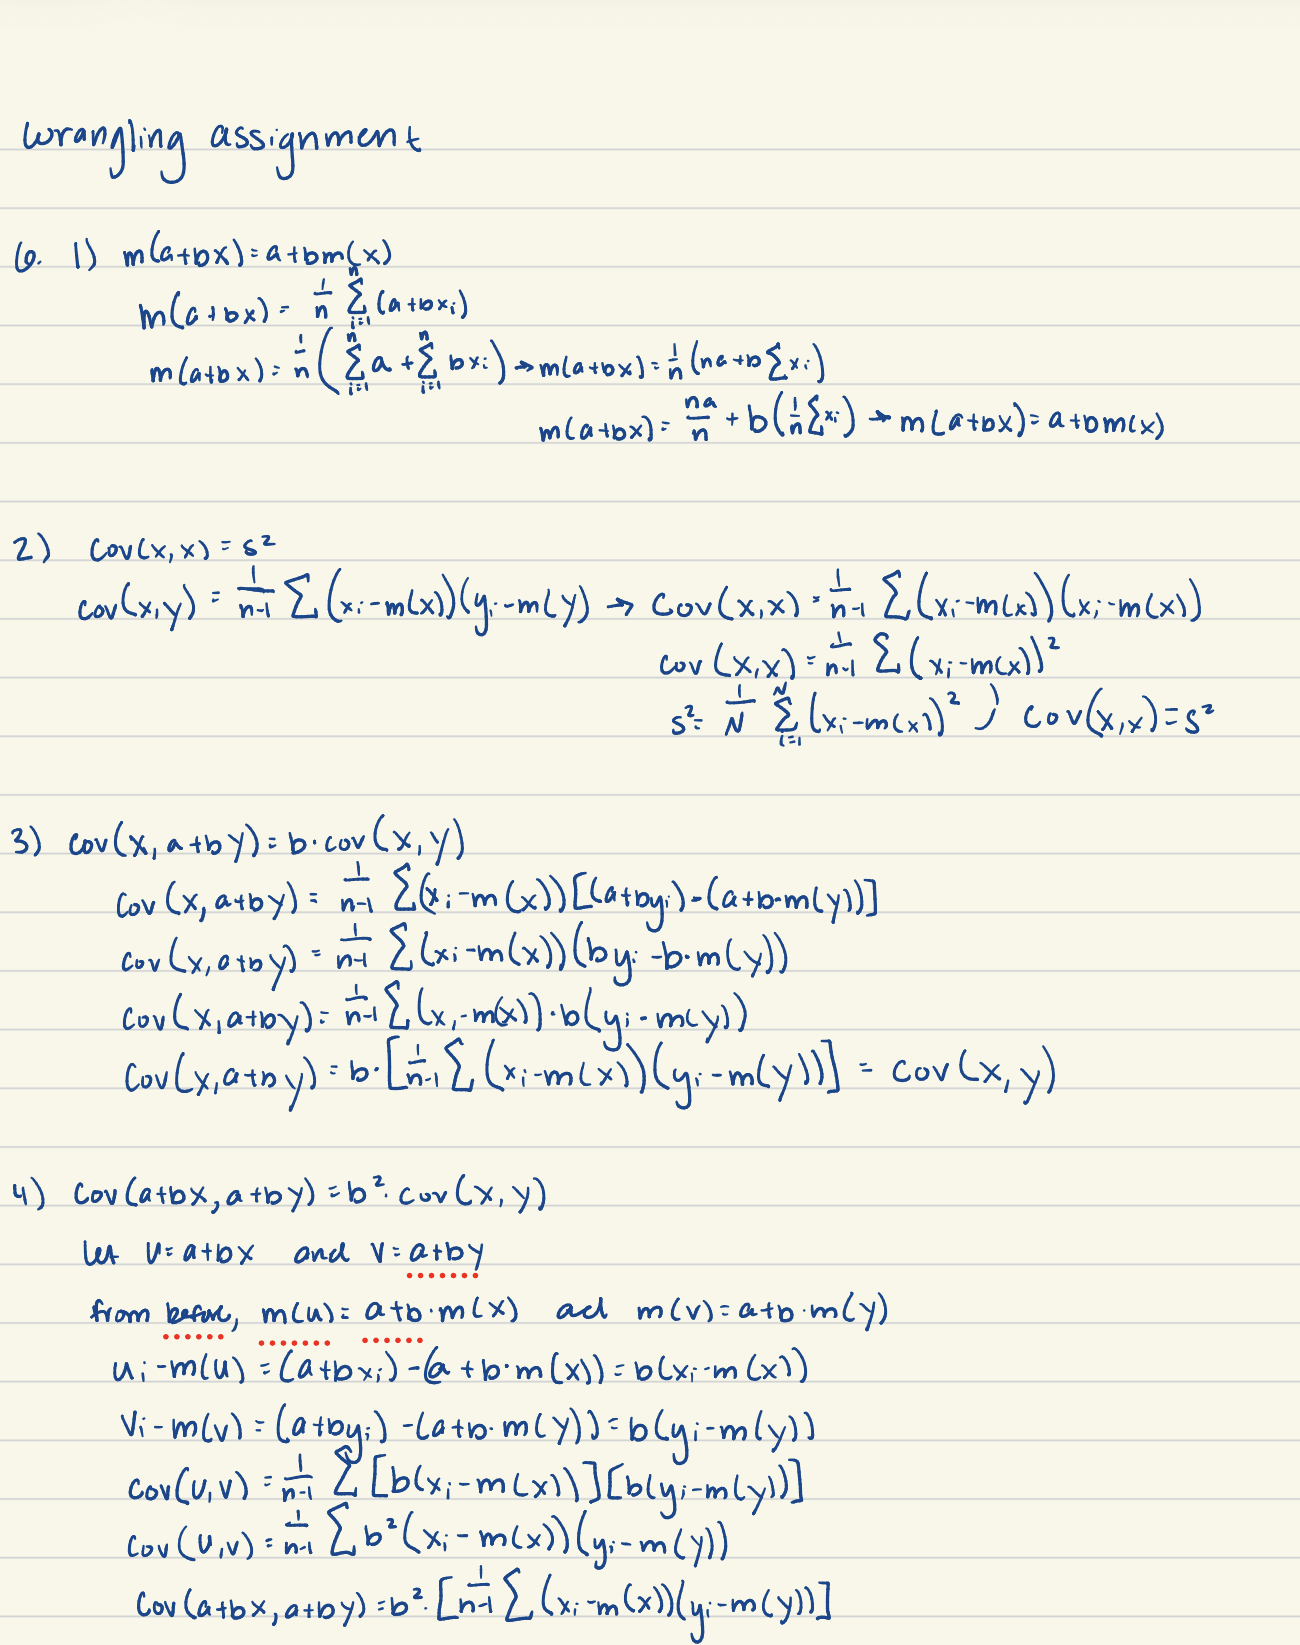
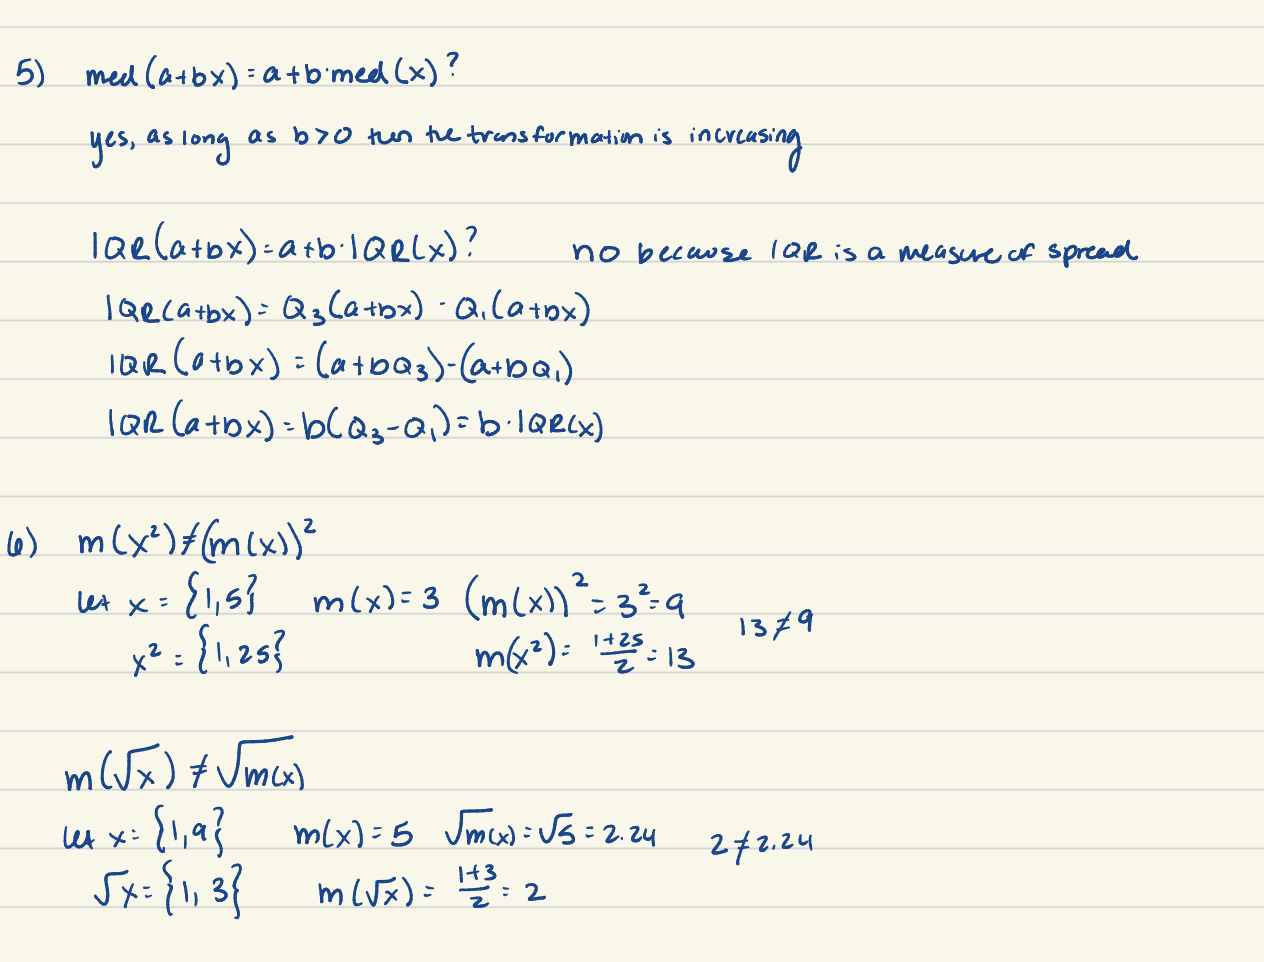

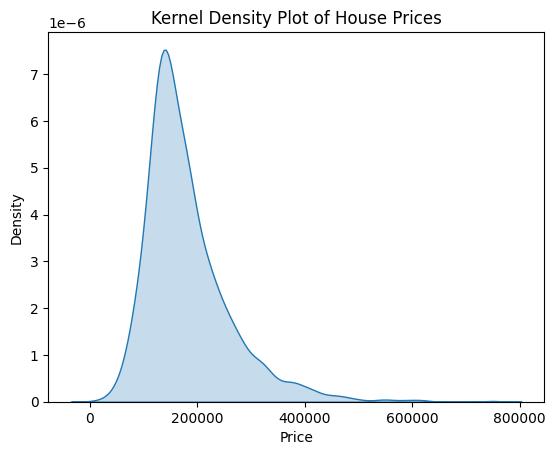

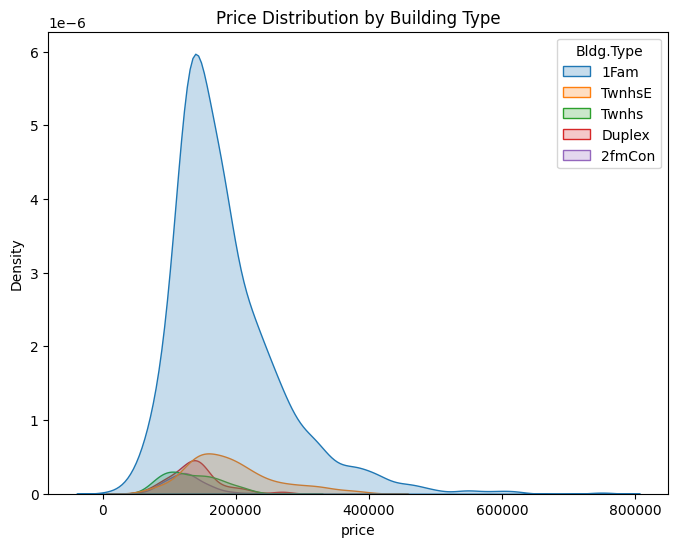

                    mean           std
Bldg.Type                             
1Fam       184812.041237  82821.802329
2fmCon     125581.709677  31089.239840
Duplex     139808.935780  39498.973534
Twnhs      135934.059406  41938.931130
TwnhsE     192311.914163  66191.738021


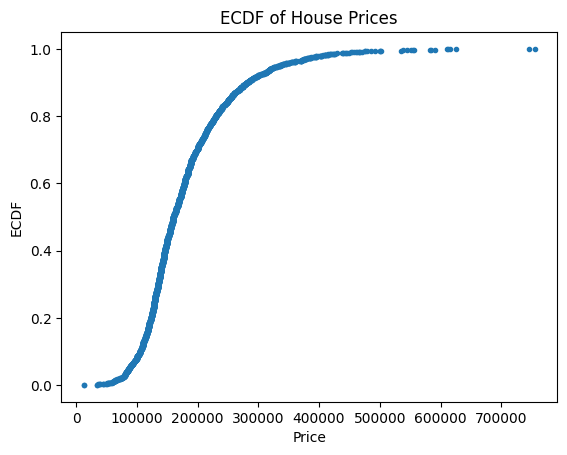

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64


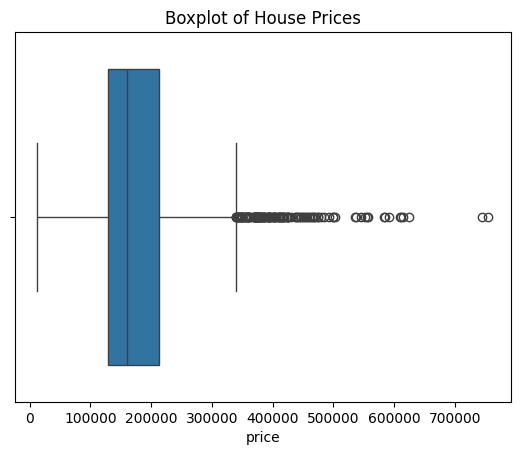

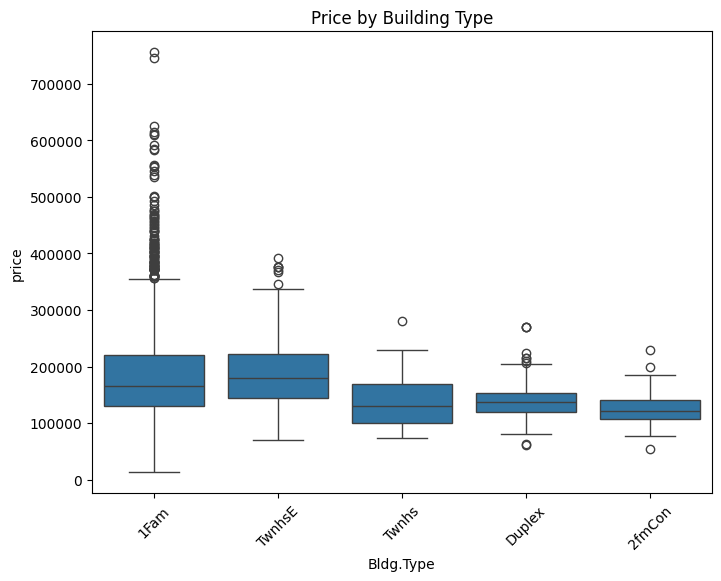

outlier
0    2793
1     137
Name: count, dtype: int64


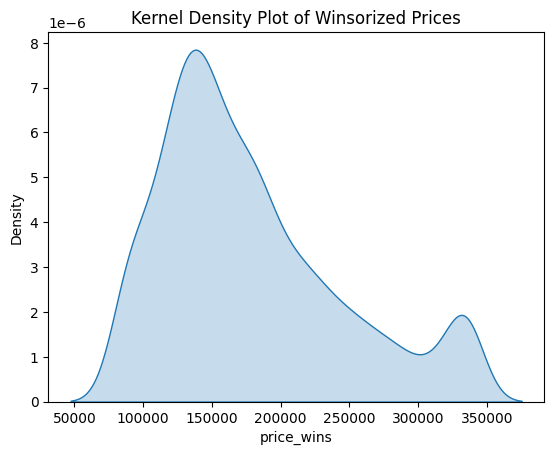

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_wins, dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [15]:
 # Q7. This question provides some practice doing exploratory data analysis and visualization.

# We'll use the ames_prices.csv dataset. The "relevant" variables for this question are:

# price - Sale price value of the house
# Bldg.Type - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)
# Load the ames_prices.csv data with Pandas.
df=pd.read_csv('/content/scratchpad/data/ames_prices.csv',encoding='latin-1')
df[['price']].describe()
# Make a kernel density plot of price and compute a describe table.
# Now, make a kernel density plot of price conditional on building type, and use .groupby() to make a describe type for each type of building.
# Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
sns.kdeplot(df['price'], fill=True)
plt.title("Kernel Density Plot of House Prices")
plt.xlabel("Price")
plt.show()

plt.figure(figsize=(8,6))
sns.kdeplot(data=df, x="price", hue="Bldg.Type", fill=True)
plt.title("Price Distribution by Building Type")
plt.show()

group_desc = df.groupby("Bldg.Type")["price"].describe()
print(group_desc[['mean','std']])
# townhouse has the highest mean prices

# Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
x = np.sort(df['price'])
y = np.arange(1, len(x)+1) / len(x)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()
print(df['price'].quantile([0, 0.25, 0.5, 0.75, 1]))

# Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()
# there are a lot of outliers to the right of the box plot
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Bldg.Type", y="price")
plt.xticks(rotation=45)
plt.title("Price by Building Type")
plt.show()
# 1 family houses have the widest range of prices but many outliers in the higher price range
# duplex and 2 family houses have the smallest ranges of price and average the lowest prices

# Make a dummy variable indicating that an observation is an outlier.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df['outlier'] = ((df['price'] < lower) | (df['price'] > upper)).astype(int)
print(df['outlier'].value_counts())

# Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?
from scipy.stats.mstats import winsorize
df['price_wins'] = winsorize(df['price'], limits=[0.05, 0.05])
sns.kdeplot(df['price_wins'], fill=True)
plt.title("Kernel Density Plot of Winsorized Prices")
plt.show()
print(df['price_wins'].describe())
# The mean decreased adn the graph became less right-skewed but the median stays almost exactly the same.
